# Predicting House Sales in Northwestern County.

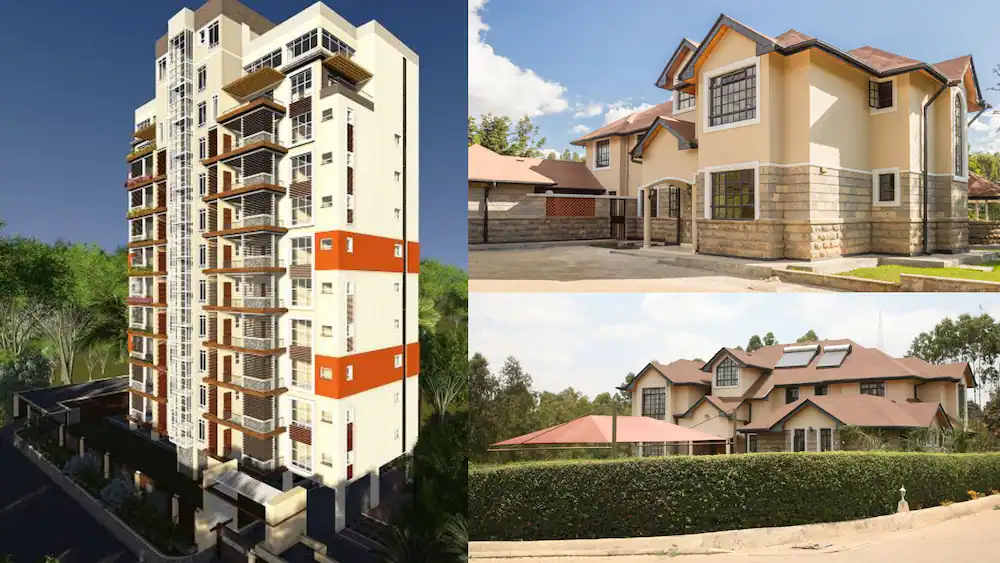

## Project Overview

The King County Data Set has information about houses in NorthWestern County, including their size, number of bedrooms, number of bathrooms, condition, floors and other features. The objective of this project is to create regression model that can accurately predict the price of a house.

The project aims to meet the requests made by the stakeholder (real estate company) interested in purchasing homes within NorthWestern County. Their main concerns revolve around obtaining predicted prices for homes in the area, and assessing any notable disparities between the actual prices and our model's predicted prices. With a better understanding of the significant factors influencing house prices in NorthWestern County, the real estate agent can assist buyers in determining the appropriateness of a property's price and help sellers set competitive prices. By exploiting the insights gained from this analysis, the stakeholder can make more informed decisions, improve market efficiency, and contribute to the overall development of the real estate sector in NorthWestern County.


# Business Understanding
Our stakeholder is a real-estate company, who is looking to expand its market to NorthWestern County, starting in 2023. The primary objective of the stakeholder is to develop a platform that can offer precise house price estimates which are important to both buyers and sellers in NorthWestern County. To achieve this we need tp provide a reliable prediction metric for house prices and would like to know which features of houses are most important. Our task is to provide them with a model that will infer features that are most important in determining housing prices in this area. The model will be able to make precise estimations of a house’s value based on its features thus the information drawn from the model will help both buyers and sellers to make well-informed decisions regarding property transactions.
General trends in the housing market include supply and demand dynamics, price appreciation over the long term, regional disparities, the impact of interest rates and mortgage markets, and housing affordability challenges.

## Data Understanding
For this project, I will be using the King County House Sales dataset, the dataset includes various features such as the price, number of bedrooms,number of bathrooms, living area size, house grade, condition of the house, just to name a few.

The dataset has 21 columns and over 21597 rows, covering sales of houses between the years 2014 and 2015. 

The King County House Sales dataset contains the following columns:

* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
* `view` - Quality of view from house
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
* `grade` - Overall grade of the house. Related to the construction and design of the house.
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors

The features that describe the size, quality, location, and age of the house are expected to have an impact on the price of the house. The features that describe the neighborhood characteristics are also included to capture the external factors that may influence the price.


# Data Understanding
Import necessary modules for analysis.

In [1]:
# importing the relevant libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import statsmodels
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import warnings
from matplotlib.lines import Line2D
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset and previewing the first 5 rows
data = pd.read_csv(r'C:\Users\admin\Desktop\Phase 2 project\Phase_2_project\data\kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
# previewing the last 5 rows
data.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,NO,NONE,...,7 Average,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [4]:
# checking the number of rows and columns
data.shape

(21597, 21)

The dataset has 21597 rows and 21 columns

In [5]:
# checking the dataset datatypes.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

* 15 columns have the numeric datatype, while 6 columns have string datatype among these is date which we will convert to date type
* Most of the columns consist of numerical data, making them well-suited for linear regression analysis.

### Checking the descriptive statistics of the dataset.

In [6]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


From the table above we can see:
* That the mean price of a house is USD 540,297 with the maximum price being USD 7,700,000 and the minimum price being USD 78,000. The standard deviation of the price is USD 367,368.

* The mean number of bedrooms of a house is 3 bedrooms with the maximum number of bedrooms being 33 and the minimum being 1. The standard deviation is 0.93. 

* The mean number of bathrooms is 2. The house with highest number of bathrooms has 8 while the one that has the least has 0.5. The standard deviation is 0.77. 

* The mean number of floors in house in King county is 1.5 with the highest having 3.5 floors and the lowest having 1 with a standard deviation of 0.5 

## Data Preparation

## Converting various columns from categorical data to numerical data.

### Using label encoder to convert categorical data to numerical data.

In [7]:
#Checking for the data used in the "view" column
data['view'].unique()

array(['NONE', nan, 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [8]:
#'View' column transformation
data['view'].replace(to_replace=['NONE', 'AVERAGE', 'GOOD', 'FAIR', 'EXCELLENT'], 
                     value=[0, 1, 2, 3, 4], inplace=True)

In [9]:
# Checking the data in waterfront column
data['waterfront'].unique()

array([nan, 'NO', 'YES'], dtype=object)

In [10]:
# Waterfront column transformation
data['waterfront'].replace(to_replace=['NO', 'YES'], value=[0, 1], inplace=True)


In [11]:
# Checking data in condition column.
data['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [12]:
# Condition column transformation
data['condition'].replace(to_replace=['Poor', 'Fair', 'Average', 'Good', 'Very Good'], 
                          value=[0, 1, 2, 3, 4], inplace=True)

In [13]:
# checking data in grade column
data['grade'].unique()

array(['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [14]:
# grade column transformation
data['grade'].replace(to_replace=['7 Average', '8 Good', '11 Excellent', '9 Better', '6 Low Average',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], value=[7, 8, 11, 9, 6, 5, 10, 12, 4, 3, 13], inplace=True)

In [15]:
# Changing the sqft_basement from object to int
data['sqft_basement'] = pd.to_numeric(data['sqft_basement'], errors='coerce')

In [16]:
# Changing the date to date time
data['date'] = pd.to_datetime(data['date'])
# Extracting only the year from the column Date
data.date = data['date'].dt.year
# Creating a new column for sell year
data['sell_yr'] = pd.to_datetime(data['date'],format='%Y').dt.year
data.drop(columns='date', inplace=True)

In [17]:
# dropping the unnecessary columns for the analysis.
data.drop(columns=['id', 'lat', 'long'], inplace=True)


In [18]:
# previewing the dataset to see if the encoding changes have been implemented.
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,sell_yr
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,2,7,1180,0.0,1955,0.0,98178,1340,5650,2014
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,2,7,2170,400.0,1951,1991.0,98125,1690,7639,2014
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,2,6,770,0.0,1933,NaN,98028,2720,8062,2015
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,4,7,1050,910.0,1965,0.0,98136,1360,5000,2014
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,2,8,1680,0.0,1987,0.0,98074,1800,7503,2015


Checking the number of null values in the dataset.

In [19]:
# Checking for NaN Values as a % of the Data Set as a whole.
data.isnull().mean()*100

price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     2.102144
yr_built          0.000000
yr_renovated     17.789508
zipcode           0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
sell_yr           0.000000
dtype: float64

From the above table:
* waterfront has 11% of null values.
* view has 0.3% null values.
* yr_renovated has 18% null values.

Handling Missing Values
* Fill the missing values in the waterfront column with 0, assuming that the houses without this information do not have a waterfront. 
* Fill the missing values in the view column with the median value, assuming that the houses without this information have an average view. 
* Drop the remaining missing values in the yr_renovated, as they are not many and may not affect the analysis significantly. 

In [20]:
# filling the missing values in waterfront and view columns
data['waterfront'].fillna(0, inplace=True)
data['view'].fillna(data['view'].median(), inplace=True)

# dropping the missing values in yr_renovated
data.dropna(inplace=True)

### Checking for duplicates.

In [21]:
duplicates=data[data.duplicated()]

In [22]:
# checking the number of duplicated values
duplicates.shape

(5, 18)

In [23]:
# Dropping the duplicated data
data.drop_duplicates(keep='first', inplace=True)

## Exploratory Data Analysis

In this section, I will perform exploratory data analysis (EDA) to understand the data better and discover any patterns, trends, or outliers that may exist.

I will use descriptive statistics and visualizations to summarize the data and examine the relationships between the predictors and the target variable. 

I will check whether the distribution is normal and the correlation of variables and identify the potential merits or problems for the data analysis.

### Univariate Analysis

This refers to analysis of one variable. Its purpose is to understand the distribution of values for a single variable. The most common way to use the analysis to describe a variable using summary statistics that is measures of central tendency eg mean, median, mode etc.

For this analysis I will conduct the summary statistics of the target variable - **price** because it will help to understand the distribution of the house prices in the dataset and detect any outliers that may affect the analysis. This analysis can also help compare the price variable with other predictors and evaluate the performance of the regression models.

Checking the distribution of the target variable which is the **price** of houses in King County and the summary statistics.

count    1.738400e+04
mean     5.409685e+05
std      3.702035e+05
min      8.000000e+04
25%      3.215000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


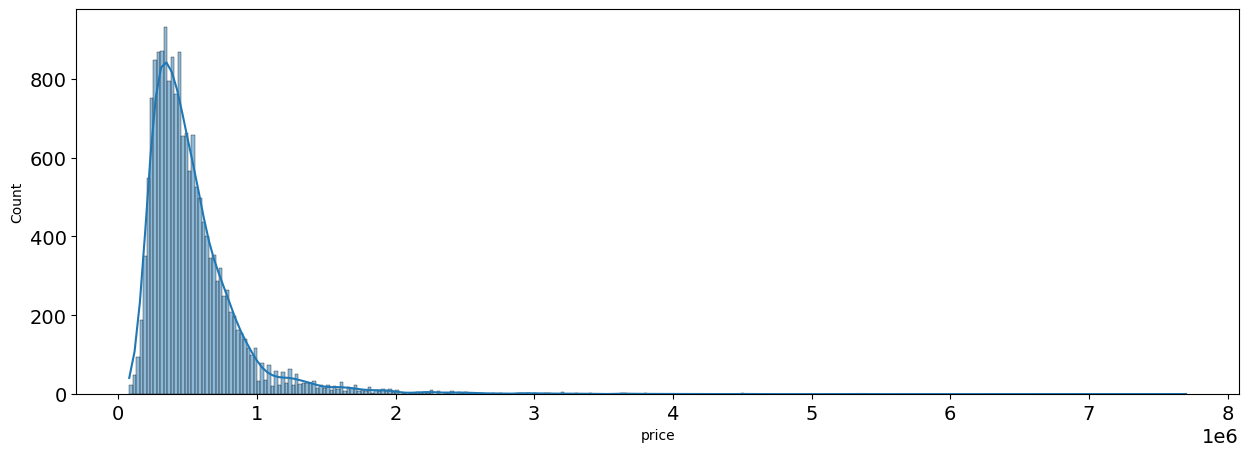

In [110]:
# This shows the summary statistics of the variable price.
print(data['price'].describe())
#setting the figure size
plt.figure(figsize=(15,5))

#Plotting a histogram to check the distribution of the price
sns.histplot(data['price'], kde=True)  
plt.show()

* From the observation above we can see that the data distribution is skewed to the right, which means that the houses with lower prices are numerous compared to houses with higher prices.


Next we need to plot boxplot. A boxplot displays the five-number summary of a set of data. The five-number summary is the minimum, first quartile, median, third quartile, and maximum.
Box plots give a good graphical image of the concentration of the data. They also show how far the extreme values are from most of the data. Outliers can affect the analysis and accuracy of regession model.

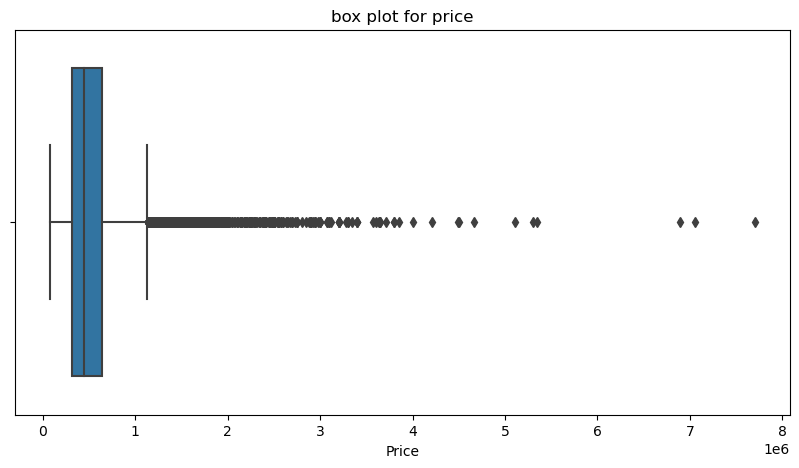

In [25]:
# plotting the boxplot.
plt.figure(figsize=(10,5))
sns.boxplot(x=data['price'])
plt.xlabel('Price')
plt.title('box plot for price')
plt.show;

From the visualization above we can see that we have outliers but i decided not to remove them since it will have an effect on the accuracy of the analysis, and the result could be incorrect.

### Bivariate Analysis

In order to run linear regression, there are some conditions we need to check for.
* Linear Relationship.
There should be a linear relationship between independent and dependent variables. This can be checked by using scatterplots and looking at correlations.

In [26]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'sell_yr'],
      dtype='object')

Text(0, 0.5, 'Price')

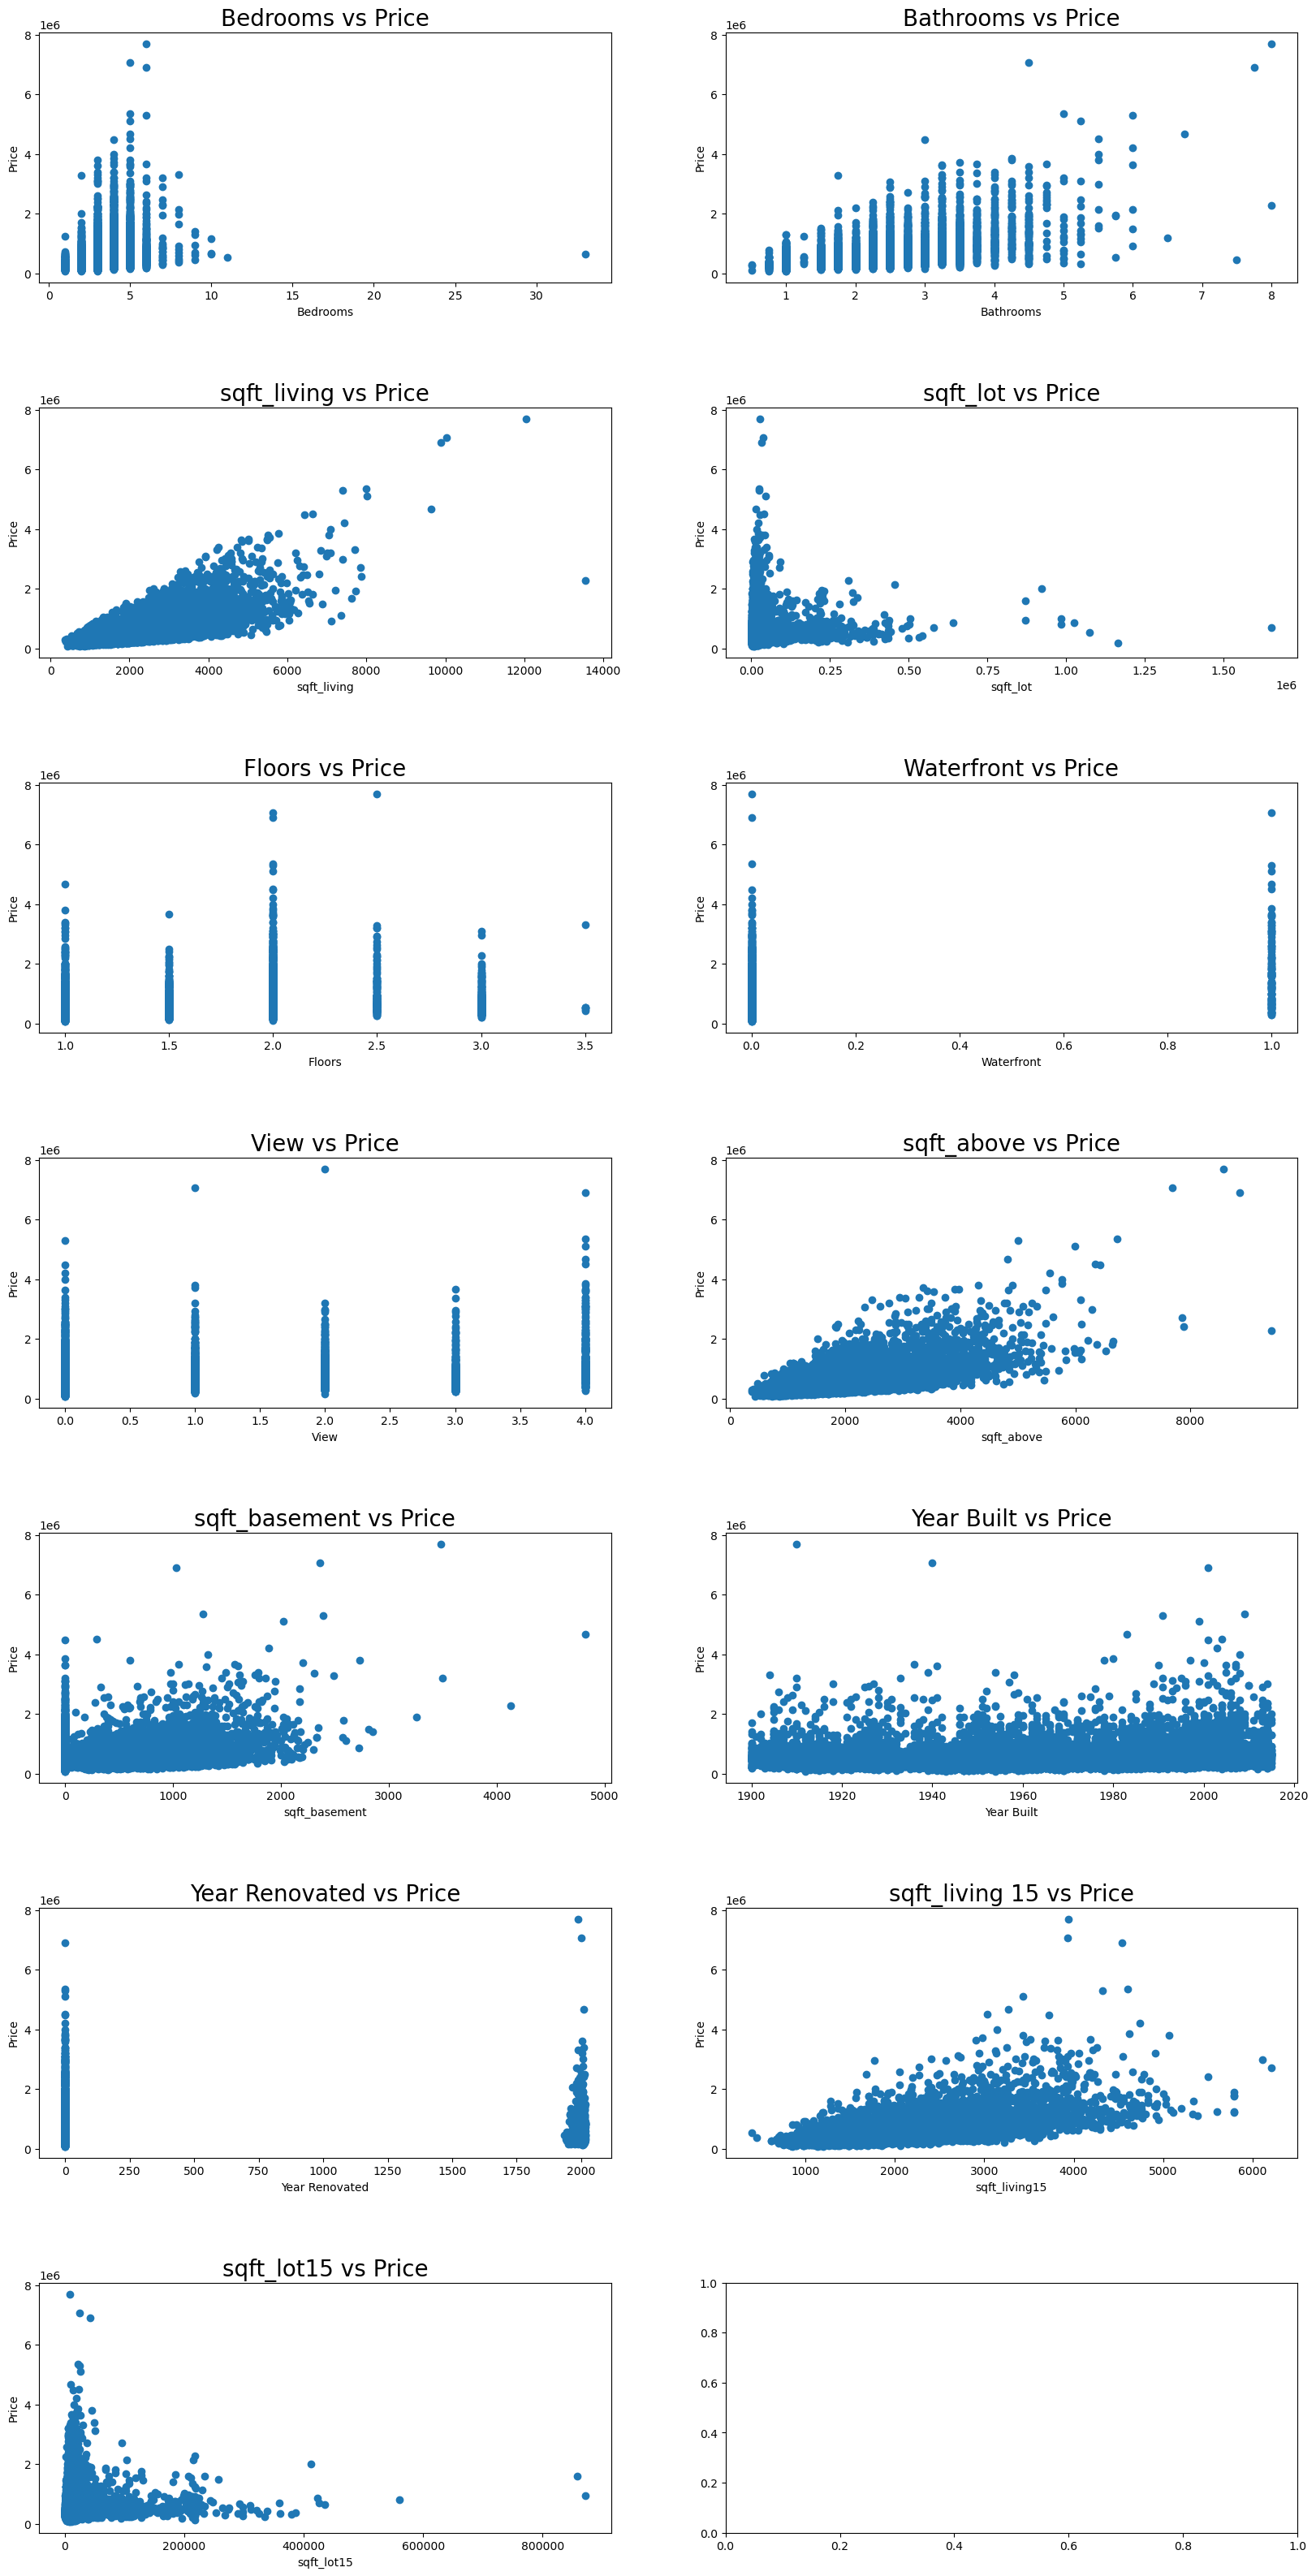

In [27]:
#Plotting the independent variables to the target 

fig, ax = plt.subplots(7,2, figsize=(20,40))
y = data["price"]
plt.subplots_adjust(hspace = 0.5)

#adjusting the font sizes in the scatterplots
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14


ax[0,0].scatter(data['bedrooms'],y)
ax[0,0].set_title ("Bedrooms vs Price")
ax[0,0].set_xlabel("Bedrooms")
ax[0,0].set_ylabel("Price")

ax[0,1].scatter(data['bathrooms'],y)
ax[0,1].set_title ("Bathrooms vs Price")
ax[0,1].set_xlabel("Bathrooms")
ax[0,1].set_ylabel("Price")

ax[1,0].scatter(data['sqft_living'],y)
ax[1,0].set_title ("sqft_living vs Price")
ax[1,0].set_xlabel("sqft_living")
ax[1,0].set_ylabel("Price")

ax[1,1].scatter(data['sqft_lot'],y)
ax[1,1].set_title ("sqft_lot vs Price")
ax[1,1].set_xlabel("sqft_lot")
ax[1,1].set_ylabel("Price")

ax[2,0].scatter(data['floors'],y)
ax[2,0].set_title ("Floors vs Price")
ax[2,0].set_xlabel("Floors")
ax[2,0].set_ylabel("Price")

ax[2,1].scatter(data['waterfront'],y)
ax[2,1].set_title ("Waterfront vs Price")
ax[2,1].set_xlabel("Waterfront")
ax[2,1].set_ylabel("Price")

ax[3,0].scatter(data['view'],y)
ax[3,0].set_title ("View vs Price")
ax[3,0].set_xlabel("View")
ax[3,0].set_ylabel("Price")

ax[3,1].scatter(data['sqft_above'],y)
ax[3,1].set_title ("sqft_above vs Price")
ax[3,1].set_xlabel("sqft_above")
ax[3,1].set_ylabel("Price")

ax[4,0].scatter(data['sqft_basement'],y)
ax[4,0].set_title ("sqft_basement vs Price")
ax[4,0].set_xlabel("sqft_basement")
ax[4,0].set_ylabel("Price")

ax[4,1].scatter(data['yr_built'],y)
ax[4,1].set_title ("Year Built vs Price")
ax[4,1].set_xlabel("Year Built")
ax[4,1].set_ylabel("Price")

ax[5,0].scatter(data['yr_renovated'],y)
ax[5,0].set_title ("Year Renovated vs Price")
ax[5,0].set_xlabel("Year Renovated")
ax[5,0].set_ylabel("Price")

ax[5,1].scatter(data['sqft_living15'],y)
ax[5,1].set_title ("sqft_living 15 vs Price")
ax[5,1].set_xlabel("sqft_living15")
ax[5,1].set_ylabel("Price")

ax[6,0].scatter(data['sqft_lot15'],y)
ax[6,0].set_title ("sqft_lot15 vs Price")
ax[6,0].set_xlabel("sqft_lot15")
ax[6,0].set_ylabel("Price")

 The scatter plots show that there is a positive relationship between most of the independent variables and the price of a house. This means that houses with higher values for these variables tend to be more expensive. 
 From the scatterplots, the following independent variables show a linear relationship in relationship to **price** which is the target variable:

1. Bathrooms
2. grade
3. Sqft_living
4. Sqft_above
5. Sq_ft living 15

In [28]:
# look at correlations between the other variables and price.
data.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.704009
grade            0.664777
sqft_above       0.607953
sqft_living15    0.585951
bathrooms        0.526023
view             0.385011
sqft_basement    0.323395
bedrooms         0.307713
waterfront       0.269666
floors           0.256456
yr_renovated     0.128293
sqft_lot         0.086134
sqft_lot15       0.082481
yr_built         0.051293
condition        0.031586
sell_yr          0.004060
zipcode         -0.052189
Name: price, dtype: float64

From the above information we can see that sqft_living has highest correlation to price.

### Multivariate Analysis.
This is the statistical study of data where multiple measurements are made on each experimental unit and where the relationships among multivariate measurements and their structure are important.

#### Multicollinearity check
For this analysis I will perform multivariate analysis to examine the relationship between the target variable **price** and multiple features in the data. A correlation matrix will be used for the multicollinearity check. I will use heatmap to visualize the correlation matrix of the features and see how they are related to each other and to the **price**. 

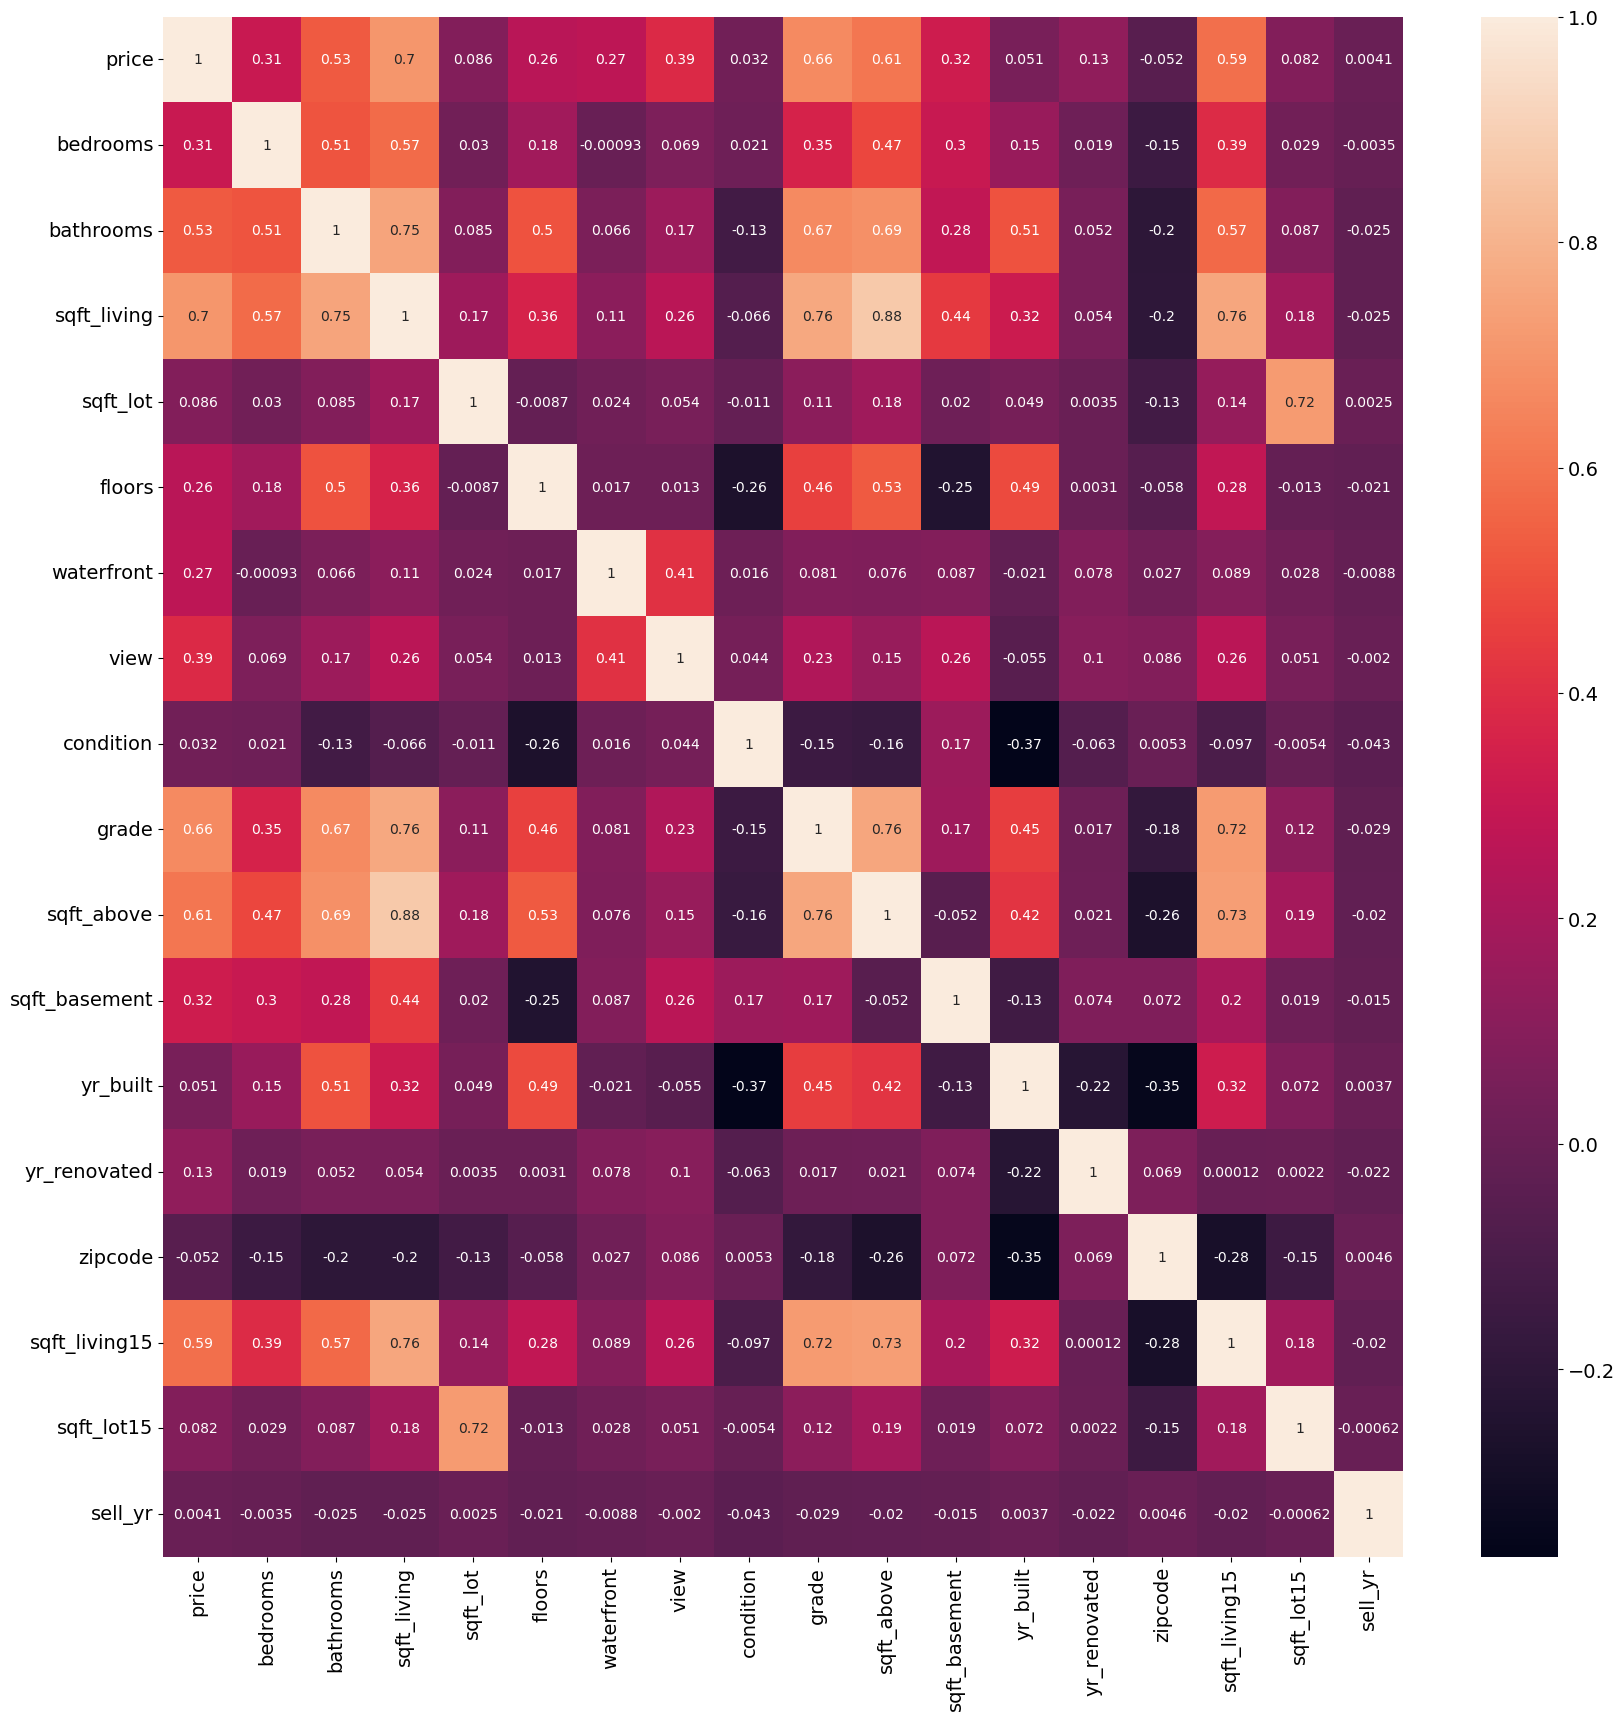

In [29]:
# Assigning variable to correlation
correlation_matrix = data.corr()

# Create a new figure with a specific size (in inches)
plt.figure(figsize=(20, 20))

sns.heatmap(correlation_matrix, annot=True)
plt.show()

From the above visualization we can see that the variables **sqft_living, grade, sqft_living15, sqft_above, and bathrooms** demonstrate the highest correlations with the price.

## Linear Regression

### Simple Linear Regression
Since sqft_living has the highest correlation to price I will build a model using it. I will use the ordinary least squares method to estimate the slope and the intercept of the line of best fit. The F-statistic and the p-value will be used to test the overall significance of the model. The residual plot will be used to check the assumptions of linearity, homoscedasticity, and normality. It will also check if the residuals are normally distributed.




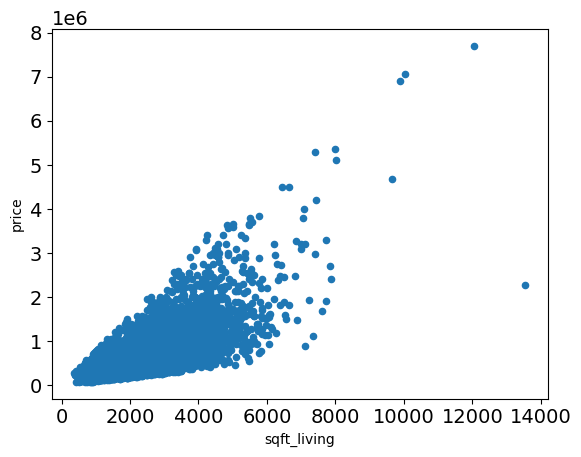

In [30]:
# plot a scatter plot to show the relationship between the two.
data.plot.scatter(x='sqft_living', y='price');


The scatter plot shows that there is a positive relationship between the **sqft_living** and **price**, meaning that houses with more square foot of living space tend to be more expensive.

### Baseline Model
Here I will use linear regression to predict the house price based on one feature: the square foot of living space.

In [31]:
y = data["price"]
X_baseline = data[["sqft_living"]]

baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                 1.708e+04
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        09:18:37   Log-Likelihood:            -2.4161e+05
No. Observations:               17384   AIC:                         4.832e+05
Df Residuals:                   17382   BIC:                         4.832e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.063e+04   4946.427    -10.236      

Standardization is a technique that transforms the features to have zero mean and unit variance. I will use it to change the const from negative number to positive number. It helps to reduce the effect of outliers and scale differences among the features. Our model had a negative intercept, which means that the predicted house price would be negative when all the features are zero. 

In [32]:
# setting the variables
y = data["price"]
X_baseline = data[["sqft_living"]]
# Standardizing the independent variable
scaler = StandardScaler()
X_baseline_standardized = scaler.fit_transform(X_baseline.values.reshape(-1, 1)) 
# linear modelling
X_baseline_standardized = sm.add_constant(X_baseline_standardized)
baseline_model = sm.OLS(y, X_baseline_standardized)
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                 1.708e+04
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        09:18:37   Log-Likelihood:            -2.4161e+05
No. Observations:               17384   AIC:                         4.832e+05
Df Residuals:                   17382   BIC:                         4.832e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        5.41e+05   1994.130    271.280      0.0

In [33]:
# viewing the models parameters.
baseline_results.params

const    540968.534342
x1       260618.997720
dtype: float64

* The model is statistically significant overall, with an F-statistic p-value well below 0.05
* The model explains using the R squared about 49.6% of the variance in price is due to square foot of living area.
* The constant coefficient is 540969, representing the estimated price when the standardized sqft_living is zero. The coefficient for the standardized sqft_living (x1) is  260619, indicating that for every one standard deviation increase in sqft_living, the price is estimated to increase by 260619
* The model coefficients are both statistically significant, with t-statistic p-values well below 0.05



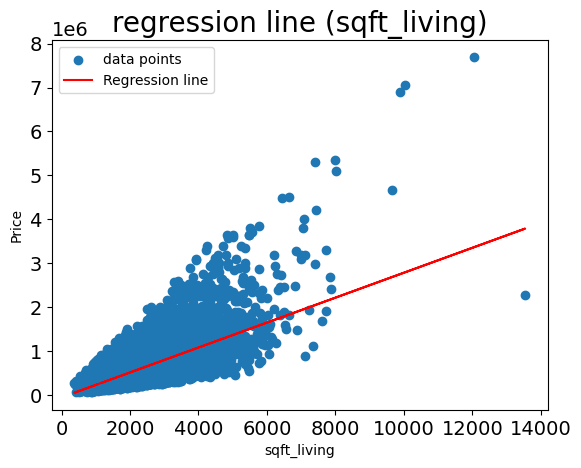

In [34]:
# Fit the linear regression model
X = data['sqft_living']
y = data['price']  
X = sm.add_constant(X) 
model = sm.OLS(y, X) 
results = model.fit() 

# scatter plot to visualize the model
plt.scatter(X['sqft_living'], y, label='data points')  
plt.plot(X['sqft_living'], results.predict(), color='red', label='Regression line') 
plt.xlabel('sqft_living')
plt.ylabel('Price')
plt.title('regression line (sqft_living)')
plt.legend()
plt.show()

The regression line above shows how well the linear regression model fits the data. The plot helps to assess the linearity of the relationship between the house price and the square footage of living space.

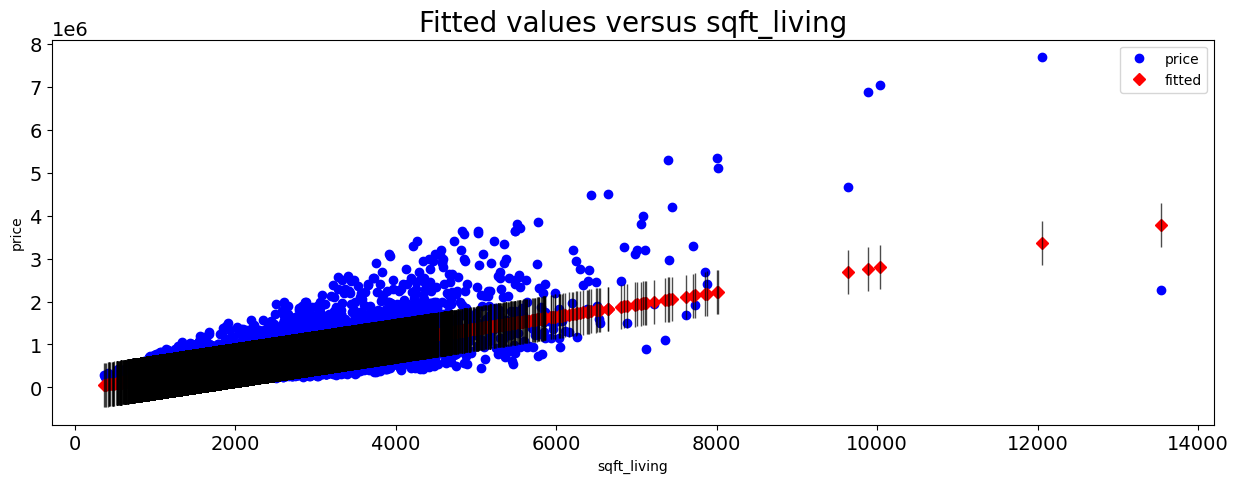

In [35]:
#visualizing the models residuals
fig, ax = plt.subplots(figsize=(15,5))
sm.graphics.plot_fit(results, "sqft_living", ax=ax)
plt.show()

From the above plot we can see that the residuals dont follow a specific pattern thus the model is not biased.

## Multiple Linear Regression
Multiple linear regression is used to estimate the relationship between two or more independent variables and one dependent variable. I will use multiple linear regression to predict house price using more than one feature. I will include the four variables that had the highest correlations with price. 

The four features are sqft_living, sqft_living15, grade, and sqft_above. These features represent the living area of the house, the average living area of the 15 nearest neighbors, the overall quality of the house, the living area above and the number of bathrooms in a house. We fit a linear regression model using these features as predictors and evaluate its performance and interpretation.

In [36]:
#choose our X and Y variables.
y = data.price
X = data[['sqft_living','sqft_living15', 'grade', 'sqft_above', 'bathrooms']]
#previewing the x 
X.head(5)

,sqft_living,sqft_living15,grade,sqft_above,bathrooms
0,1180,1340,7,1180,1.00
1,2570,1690,7,2170,2.25
3,1960,1360,7,1050,3.00
4,1680,1800,8,1680,2.00
5,5420,4760,11,3890,4.50


In [37]:
#Adding a constant
X = sm.add_constant(X)
X.head()

,const,sqft_living,sqft_living15,grade,sqft_above,bathrooms
0,1.0,1180,1340,7,1180,1.00
1,1.0,2570,1690,7,2170,2.25
3,1.0,1960,1360,7,1050,3.00
4,1.0,1680,1800,8,1680,2.00
5,1.0,5420,4760,11,3890,4.50


In [38]:
#Training and Test Set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state = 1502)

In [39]:
# perform the multiple linear regression.
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     3356.
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        09:18:40   Log-Likelihood:            -1.9270e+05
No. Observations:               13907   AIC:                         3.854e+05
Df Residuals:                   13901   BIC:                         3.855e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.308e+05   1.73e+04    -36.556

* The model is statistically significant overall, with an F-statistic p-value well below 0.05
* The model explains using the R squared about 54.7% of the variance in price is due to the four features.
* The model coefficients are all statistically significant, with t-statistic p-values well below 0.05



In [40]:
# Making the models predictions.
predictions = model.predict(X_test)
predictions[:6]

1643     2.954201e+05
13580    1.106568e+06
17908    1.627524e+05
10807    2.744810e+05
21421    4.310527e+05
8715     7.852803e+05
dtype: float64

In [41]:
# Model Evaluation using mean absolute error and mean squared error

print('MAE:', round(mean_absolute_error(y_test, predictions)))
print('RMSE:', round(np.sqrt(mean_squared_error(y_test, predictions)),1))

MAE: 161584
RMSE: 243077.4


* The model has quite high error metrics with an MAE of 161,584 and RMSE of 243,077.
* There is need to refine this model to  reduce error metrics and enhance rsquared.

Multicollinearity occurs when two ore more independent variables in a dataframe have a high correlation with one another in a regression model. To check for this, we would look at the output table for the coefficients and check the colinearity statistics for Tolerance and (Variance Inflation Factor)VIF. For this I will use the VIF to check for multicollinearity.

In [42]:
# calculating VIF to de
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    # calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return vif
calc_vif(X)

,variables,VIF
0,const,65.126088
1,sqft_living,6.035593
2,sqft_living15,2.699828
3,grade,2.984084
4,sqft_above,4.766669
5,bathrooms,2.438651


From the above table we see that **sqft_living** has a high VIF which means it is has severe correlation between it and other predictor variables in the model. High VIF value means that an independent variable can be predicted by other independent variables in the data. I dropped it so as to do a second model.

### Second Model
I will do a second model after dropping **sqft_living** due to its VIF is greater than 5. 

In [43]:
#choose our X and Y variables.
y = data.price
X = data[['sqft_living15', 'grade', 'sqft_above', 'bathrooms']]
#previewing the x 
X.head(5)

,sqft_living15,grade,sqft_above,bathrooms
0,1340,7,1180,1.00
1,1690,7,2170,2.25
3,1360,7,1050,3.00
4,1800,8,1680,2.00
5,4760,11,3890,4.50


In [44]:
#Adding a constant
X = sm.add_constant(X)
X.head()

,const,sqft_living15,grade,sqft_above,bathrooms
0,1.0,1340,7,1180,1.00
1,1.0,1690,7,2170,2.25
3,1.0,1360,7,1050,3.00
4,1.0,1800,8,1680,2.00
5,1.0,4760,11,3890,4.50


In [45]:
# Model training and the test Set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state = 1502)

In [46]:
# create model object
model_2 = sm.OLS(y_train, X_train).fit()

In [47]:
# Printing the model results.
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     3248.
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        09:18:41   Log-Likelihood:            -1.9362e+05
No. Observations:               13907   AIC:                         3.873e+05
Df Residuals:                   13902   BIC:                         3.873e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -7.645e+05   1.81e+04    -42.127      0.000      -8e+05   -7.29e+05
sqft_living15    84.8156      5.232     16.212      0.000      74.561      95.070
grade          1.211e+05   3342.597     36.219      0.000    1.15e+05    1.28e+05
sqft_above       68.1956      4.893     13.936      0.000      58.604      77.787
bathrooms      4.113e+04   4292.564      9.583      0.000    3.27e+04    4.95e+04
==============================================================================
Omnibus:                    13159.118   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1567916.467
Skew:                           4.216   Prob(JB):                         0.00
Kurtosis:                      54.330   Cond. No.                     2.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* The model is statistically significant overall, with an F-statistic p-value well below 0.05
* The model explains using the R squared about 48% of the variance in price is due to the four features.
* The model coefficients are all statistically significant, with t-statistic p-values well below 0.05

In [48]:
# Making the models predictions.
prediction = model_2.predict(X_test)
prediction[:6]

1643     305161.737697
13580    746206.639502
17908    178272.261100
10807    285619.833572
21421    550023.324084
8715     561320.755568
dtype: float64

In [49]:
# Model Evaluation using mean absolute error and mean squared error

print('MAE:', round(mean_absolute_error(y_test, prediction)))
print('RMSE:', round(np.sqrt(mean_squared_error(y_test, prediction)),1))

MAE: 170531
RMSE: 257378.8


* The model has quite high error metrics with an MAE of 170,531 and RMSE of 257,378.
* There is need to refine this model to  reduce error metrics and enhance rsquared.

#### Third Model

To conduct the third model I will drop the second column that had second highest VIF **sqft_above** and check if the model performs better than the other two.
I will only use three independent variables to determine the sales.

In [97]:
#choose our X and Y variables.
y = data.price
X = data[['sqft_living', 'sqft_living15', 'grade', 'bathrooms']]
#previewing the x 
X.head(5)

,sqft_living,sqft_living15,grade,bathrooms
0,1180,1340,7,1.00
1,2570,1690,7,2.25
3,1960,1360,7,3.00
4,1680,1800,8,2.00
5,5420,4760,11,4.50


In [98]:
#Adding a constant
X = sm.add_constant(X)
X.head()

,const,sqft_living,sqft_living15,grade,bathrooms
0,1.0,1180,1340,7,1.00
1,1.0,2570,1690,7,2.25
3,1.0,1960,1360,7,3.00
4,1.0,1680,1800,8,2.00
5,1.0,5420,4760,11,4.50


In [99]:
# Model training and the test Set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state = 1502)

In [100]:
# create model object
model_3 = sm.OLS(y_train, X_train).fit()

In [101]:
# Printing the model results.
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     4099.
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        10:40:51   Log-Likelihood:            -1.9279e+05
No. Observations:               13907   AIC:                         3.856e+05
Df Residuals:                   13902   BIC:                         3.856e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.804e+05   1.69e+04    -34.263      0.000   -6.14e+05   -5.47e+05
sqft_living     209.3043      4.706     44.479      0.000     200.081     218.528
sqft_living15    11.9283      5.100      2.339      0.019       1.932      21.924
grade          9.601e+04   3089.968     31.072      0.000       9e+04    1.02e+05
bathrooms     -3.511e+04   4380.287     -8.015      0.000   -4.37e+04   -2.65e+04
==============================================================================
Omnibus:                    11678.574   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           910244.216
Skew:                           3.577   Prob(JB):                         0.00
Kurtosis:                      41.983   Cond. No.                     2.46e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* The model is statistically significant overall, with an F-statistic p-value well below 0.05
* The model explains using the R squared about 54.1% of the variance in price is due to the four features.
* The model coefficients are all statistically significant, with t-statistic p-values well below 0.05

In [102]:
# making the predictions.
prediction_3 = model_3.predict(X_test)
prediction_3[0:5]

1643     3.017117e+05
13580    1.031164e+06
17908    1.729285e+05
10807    2.789920e+05
21421    4.485566e+05
dtype: float64

In [103]:
# Model Evaluation using mean absolute error and mean squared error

print('MAE:', round(mean_absolute_error(y_test, prediction_3)))
print('RMSE:', round(np.sqrt(mean_squared_error(y_test, prediction_3)),1))

MAE: 163441
RMSE: 245084.9


* The model has quite high error metric 163,441 MAE and 245,084 RMSE.
* The model has reduced errors compared to model 1 and model 2

#### Performing the model_3 evaluation of the residuals.

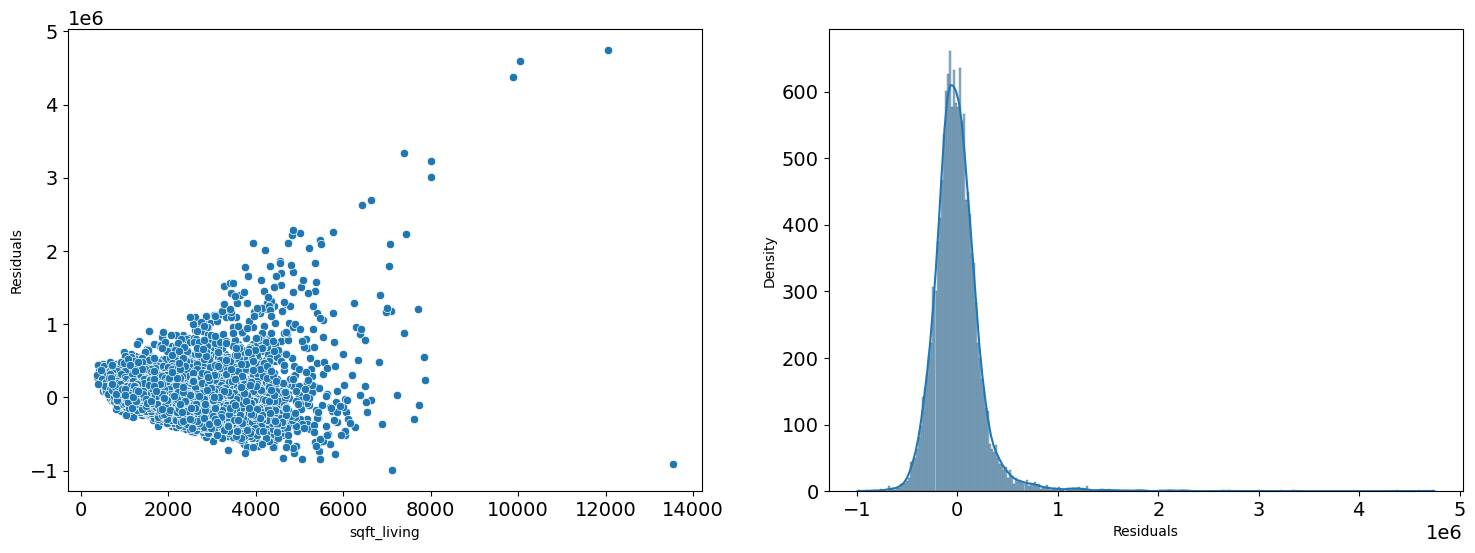

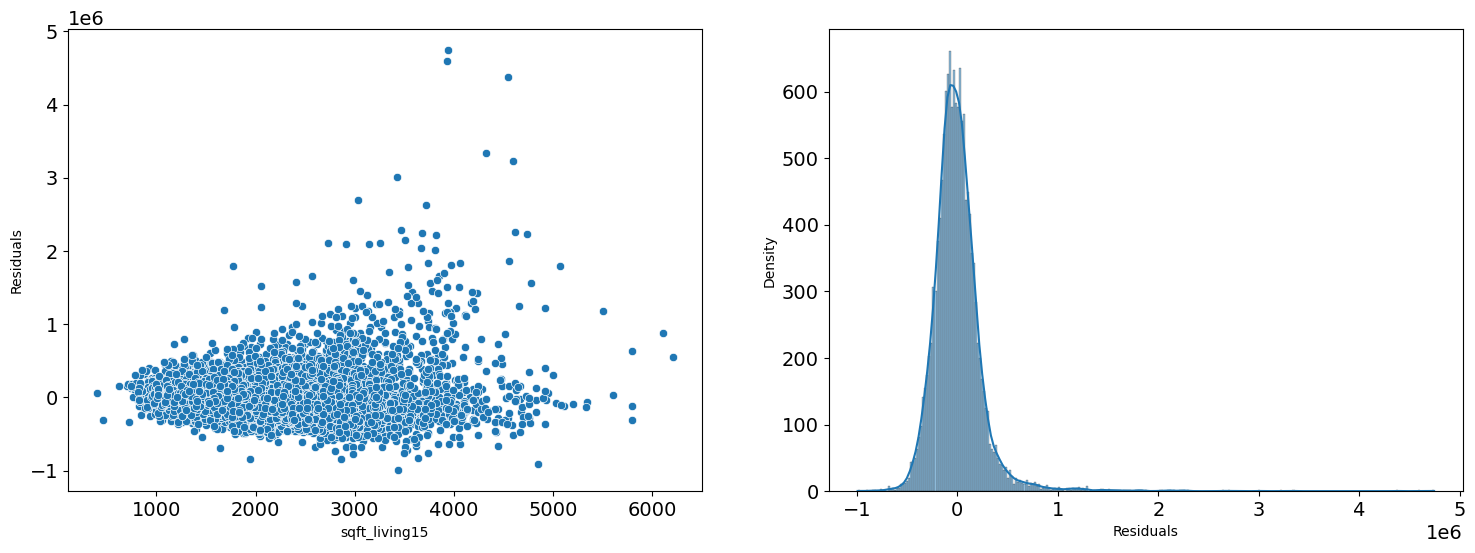

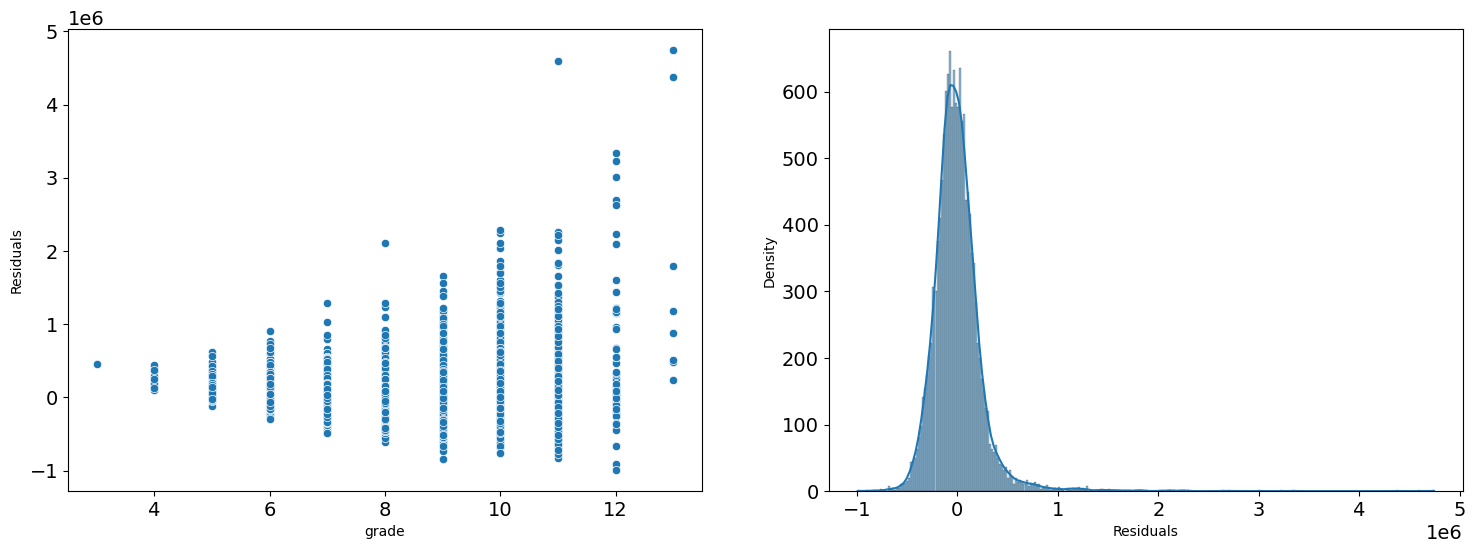

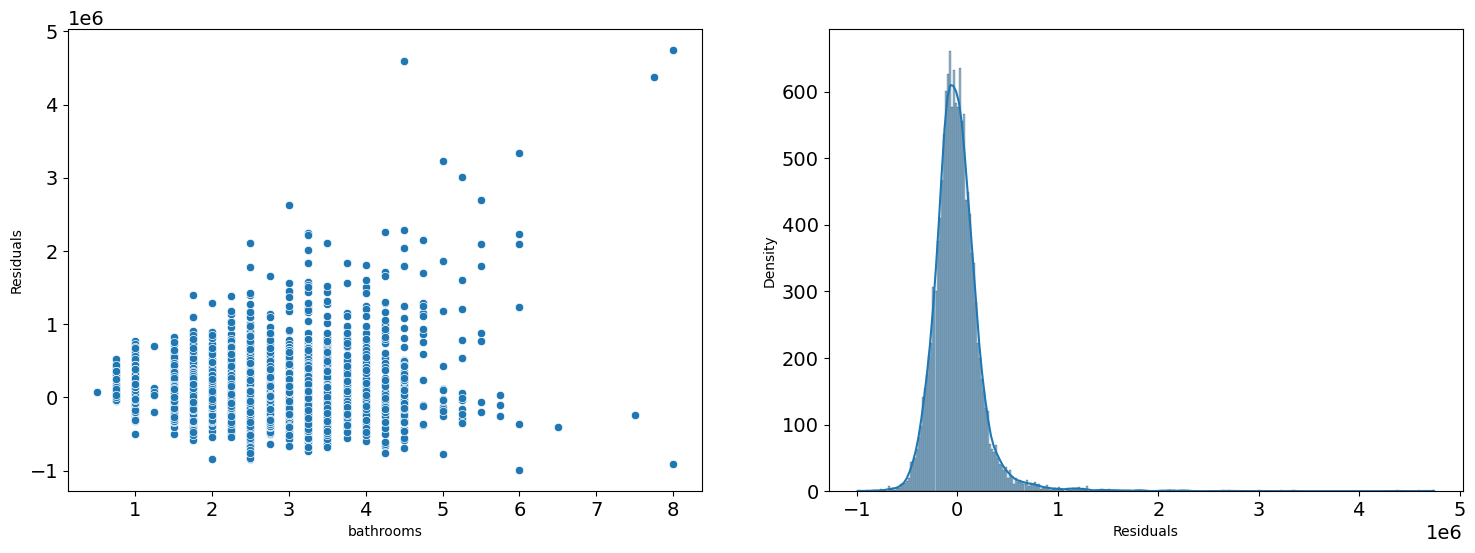

In [109]:
# Performing model  for our independent variables residuals.
def model_diagnostic(model, x, x_name, y):
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    sns.scatterplot(x=x, y=model.resid, ax=axes[0])
    axes[0].set_xlabel(x_name)
    axes[0].set_ylabel('Residuals')
    sns.histplot(model.resid, kde=True, ax=axes[1])
    axes[1].set_xlabel('Residuals')
    axes[1].set_ylabel('Density')
    plt.show()
model_diagnostic(model_3, data['sqft_living'], 'sqft_living', data['price'])
model_diagnostic(model_3, data['sqft_living15'], 'sqft_living15', data['price'])
model_diagnostic(model_3, data['grade'], 'grade', data['price'])
model_diagnostic(model_3, data['bathrooms'], 'bathrooms', data['price'])

From the above visualization, we can see that the residuals of all the four independent variables have normal distribution and there doesnt seem to be a pattern in them. Thus the four independent variables **'sqft_living', 'sqft_living15', 'grade', 'bathrooms'** pass the assumptions for regression that is normality, homoscedasticity and linearity

### I choose the final model that is model_3 due to:
* It has a higher R-squared value: model_3 has the high R-squared value of 54%, higher R-squared value suggests that model 3 captures more of the underlying patterns and trends in the data, making it a better choice for explaining the relationship between variables. That means the model is able to explain a significant amount of the variation in house prices indicating that it explains the proportion of the variance in the dependent variable compared to the other two models. R-squared measures the goodness of fit, representing the percentage of the dependent variable's variation that can be explained by the independent variables. 

* Model 1 has better performance in certain metrics but Model 3 does a better job of handling of multicollinearity thus making it a better fit.

* The model has an error metric of 163,441 MAE and 245,084 RMSE. This is low compared to the other two models. MAE and RMSE indicates that the model is not perfect but it can still be used for predicting house prices in NorthWestern County.

* The coefficients for the model indicate that the following factors have the greatest impact on the price of a house in NortnWestern County:
   * grade: Houses with higher grades tend to be more expensive.

   * sqft_living: Houses with more square footage tend to be more expensive.

   * sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors. Houses with more squarefootage are more expensive.
   
   * bathrooms: Houses with more bathrooms tend to be more expensive.


### Recommendations
* In NorthWestern County, square footage, square foot living, grade, and bathrooms have been identified as the most important factors in determining the price of house. When increasing the square footage and improving the grade of the house the home sellers should  also consider adding more bathrooms since from the analysis there exists positive relationship between these four factors.

* The real estate market is a industry that is dynamic and constantly changes. To ensure the model validity and continuous accuracy, the models needs to be regularly retrained using the latest data. This will help capture any shifts or trends in the market and maintain the model's effectiveness.



### Conclusions

* The more the number of bathrooms, the more expensive the house.

* The better the grade of the house, the more expensive the house.

* Square Footage of Living Space: The square footage of living space has a positive impact on house prices. As the size of the living space increases, the estimated price of the house also increases. This indicates that larger houses are generally priced higher.

* The model provides valuable insights into the factors affecting house prices in NorthWestern County and offers recommendations for homeowners and researchers interested in understanding the housing market dynamics.

* The selected features in our model were statistically significant linear relationships with the price, since their p-values was less than the alpha, thus the assumptions of independence, linearity, and normality were met.